# Exercise 06
Hao-Tien Kuo
## Predicting customer spending some more

*Reference: https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/

In [1]:
import numpy as np
import pandas as pd
import statistics
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('lab07_customers.csv')

In [2]:
df['income'] = np.log(df['income'])

df_2 = pd.get_dummies(df)

df_2['hispanic_men'] = df_2['race_hispanic'] * df_2['sex_male']
df_2['black_women'] = df_2['race_black'] * df_2['sex_female']
df_2['asian_women_high_edu'] = df_2['race_asian'] * df_2['sex_female'] * df_2['schoolYears']

In [3]:
# Build a linear regression with all the dependent variables and the interactions from the lab

from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

X = df_2.drop('spend', axis=1)
y = df_2['spend']

lreg.fit(X, y)
lreg.score(X, y)

0.8643841768850987

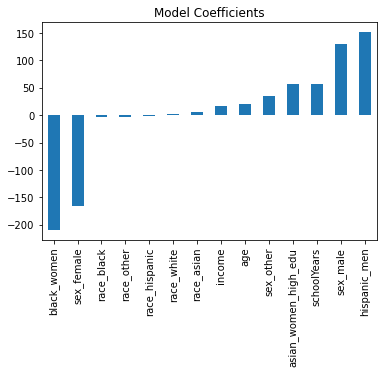

In [4]:
coef = pd.Series(lreg.coef_, X.columns).sort_values()

coef.plot(kind='bar', title='Model Coefficients')
plt.show()

### Ridge

In [5]:
# Build ridge models with various values for alpha. Create a chart showing how the coefficients change with alpha values

from sklearn.linear_model import Ridge

def ridge_alpha(X, y, alpha):
    ridgeReg = Ridge(alpha=alpha, normalize=True)
    ridgeReg.fit(X, y)
    print("R2: %f" % ridgeReg.score(X, y))
    
    coef = pd.Series(ridgeReg.coef_, X.columns).sort_values()
    coef.plot(kind='bar', title='Model Coefficients when Alpha = %.2f' % alpha)
    plt.show()

R2: 0.862322


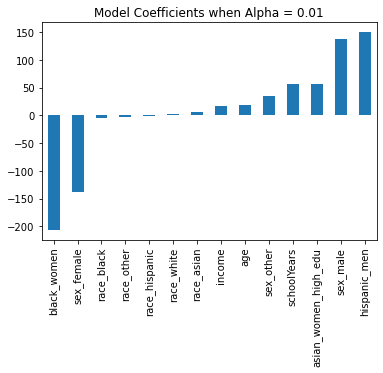

R2: 0.831552


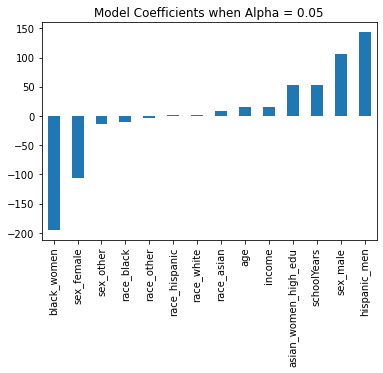

R2: 0.780205


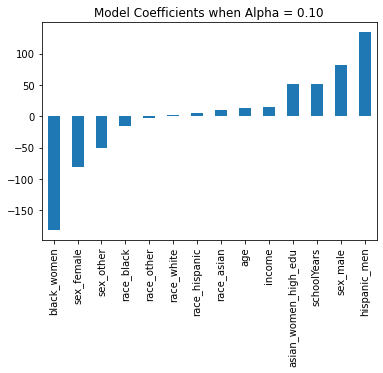

R2: 0.535471


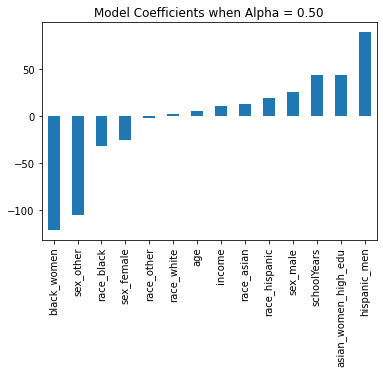

R2: 0.417575


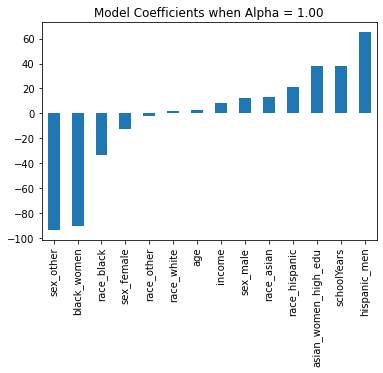

R2: 0.180205


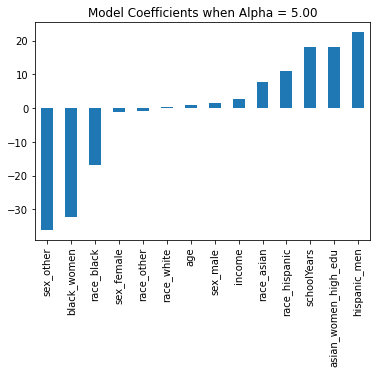

In [6]:
alpha_list = [0.01, 0.05, 0.1, 0.5, 1, 5]

for alpha in alpha_list:
    ridge_alpha(X, y, alpha)

### Lasso

In [7]:
# Build lasso models with various values for alpha. Create a chart showing how the coefficients change with alpha values

from sklearn.linear_model import Lasso

def lasso_alpha(X, y, alpha):
    lassoReg = Lasso(alpha=alpha, normalize=True)
    lassoReg.fit(X, y)
    print("R2: %f" % lassoReg.score(X, y))
    
    coef = pd.Series(lassoReg.coef_, X.columns).sort_values()
    coef.plot(kind='bar', title='Model Coefficients when Alpha = %.2f' % alpha)
    plt.show()

R2: 0.862628


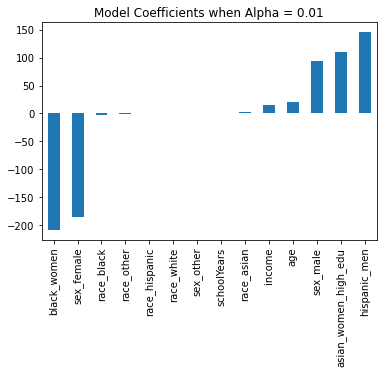

R2: 0.823582


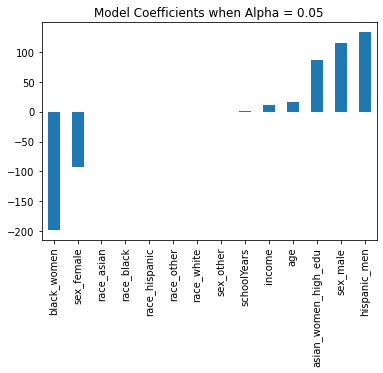

R2: 0.702871


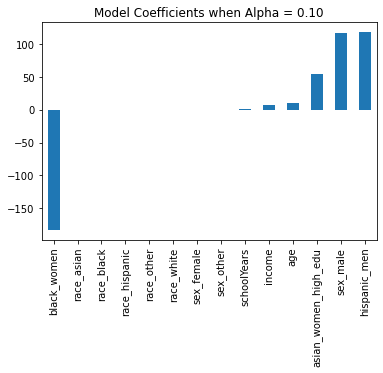

R2: 0.000000


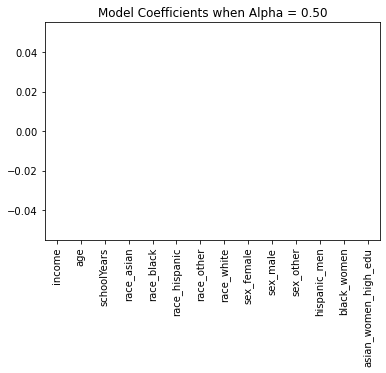

In [8]:
alpha_list = [0.01, 0.05, 0.1, 0.5]

for alpha in alpha_list:
    lasso_alpha(X, y, alpha)

In [9]:
# Compare the coefficients from linear regression, ridge, and lasso (select an alpha value using your chart)

coef_linear = pd.Series(lreg.coef_, X.columns)

ridgeReg = Ridge(alpha=0.05, normalize=True)
ridgeReg.fit(X, y)
coef_ridge = pd.Series(ridgeReg.coef_, X.columns)

lassoReg = Lasso(alpha=0.05, normalize=True)
lassoReg.fit(X, y)
coef_lasso = pd.Series(lassoReg.coef_, X.columns)

# I set alpha to 0.05 for both ridge and lasso

In [10]:
df_coef = pd.concat([coef_linear, coef_ridge, coef_lasso], axis=1, keys=['Linear', 'Ridge', 'Lasso'])

df_coef

# Ridge model decreases the value of some coefficients, but cannot make them zero
# Lasso model makes some coefficients zero, removing those predictor variables completely

,Linear,Ridge,Lasso
income,16.731040,15.936140,11.695198
age,20.714053,15.634488,15.603910
schoolYears,57.543285,53.892768,1.176059
race_asian,5.659278,8.666372,0.000000
race_black,-3.313577,-9.818470,-0.000000
race_hispanic,-1.672174,1.958909,0.000000
race_other,-2.867291,-3.082066,-0.000000
race_white,2.193764,2.314880,0.000000
sex_female,-165.825386,-106.021290,-92.010615
sex_male,130.408977,106.101995,114.487514


### Compare the R2 from lr, ridge, and lasso
- Linear: 0.864
- Ridge: 0.831
- Lasso: 0.823

### Which model would you choose, and why?

I would choose the lasso model with alpha = 0.05 because of its simplicity. It provides good interpretablility and generalizability, without sacrificing much accuracy. 

### Interpret your chosen model

- We can expect spending to increase with income and age. There is a 12-dollar increase with a unit increase in income, and a 16-dollar increase with a unit increase in age.
- In terms of gender, men tend to spend 200 dollars more than women on average.
- Hispanic Men spend even more than average men.
- Black Women spend even less than average women.
- Asian Women with Higher education spend more than the baseline.